
# Keras neural network model for mutagenicity



In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Genotox_QSAR.csv

import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving Genotox_QSAR.csv to Genotox_QSAR.csv


In [ ]:
import warnings

# Para ignorar todos os warnings
warnings.filterwarnings("ignore")

In [ ]:
# matrix
data

,CAS_Number,Formula,OVERALL,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,50-32-8,C20H12,3,C1=CC=C2C3=C4C(=CC2=C1)C=CC5=C4C(=CC=C5)C=C3,2.309074,2.309074,1.317945,1.317945,0.243454,12.000000,...,0,0,0,0,0,0,0,0,0,0
1,1955-45-9,C5H8O2,3,CC1(COC1=O)C,10.329861,10.329861,0.076389,-0.180556,0.415828,25.714286,...,0,0,0,0,0,0,0,0,0,0
2,101-61-1,C17H22N2,1,CN(C)C1=CC=C(C=C1)CC2=CC=C(C=C2)N(C)C,2.203562,2.203562,0.987517,0.987517,0.824724,10.315789,...,0,0,0,0,0,0,0,0,0,0
3,612-64-6,C8H10N2O,1,CCN(C1=CC=CC=C1)N=O,10.212457,10.212457,0.604676,0.604676,0.488401,9.181818,...,0,0,0,0,0,0,0,0,0,0
4,90-94-8,C17H20N2O,1,CN(C)C1=CC=C(C=C1)C(=O)C2=CC=C(C=C2)N(C)C,12.381396,12.381396,0.056122,0.056122,0.796270,10.200000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,14129-84-1,C4H2Cl4O,3,C(=O)C(=C(Cl)Cl)C(Cl)Cl,9.992315,9.992315,0.012346,-0.951389,0.386834,9.444444,...,0,0,0,0,0,0,0,0,0,0
6222,99601-32-8,C13H14N4,3,CCN1C2=C(C3=C(C=C2C)N=CC=C3)N=C1N,5.955206,5.955206,0.571253,0.571253,0.693186,11.411765,...,0,0,0,0,0,0,0,0,0,0
6223,100924-64-9,C19H14O4S,3,C1=CC=C2C(=C1)C=CC3=C2C(=CC4=CC=CC=C34)COS(=O)...,11.001168,11.001168,0.214112,-4.497513,0.442202,12.208333,...,0,0,0,0,0,0,0,0,0,0
6224,99520-58-8,C22H12O,3,C1=CC2=C3C(=C1)C=C4C5=C(C=CC(=C5)O)C6=C4C3=C(C...,9.942758,9.942758,0.324784,0.324784,0.343572,12.521739,...,0,0,0,0,0,0,0,0,0,0


### Removing columns with many zeros

In [ ]:
columns_to_drop = ['Ipc', 'SMR_VSA8', 'SlogP_VSA9', 'fr_prisulfonamd'] # Replace with your column names
data = data.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Print the column names to verify the exact target column name
print(data.columns)

Index(['CAS_Number', 'Formula ', 'OVERALL ', 'SMILES', 'MaxAbsEStateIndex',
       'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=217)


In [ ]:
unique_labels = data['OVERALL '].unique()
print(unique_labels)


[3 1 2]


In [ ]:
#the occurrences of each value in the 'OVERALL' column

print(data['OVERALL '].value_counts())

OVERALL 
3    3515
1    2553
2     158
Name: count, dtype: int64


In [ ]:
saida = data['OVERALL ']   # output of model
print(saida.shape)

(6226,)


In [ ]:
X = data.drop(['CAS_Number', 'Formula ', 'SMILES',	'OVERALL '], axis=1)   #eliminating columns from the original data, keeping only the descriptors
print(X.shape)

(6226, 213)


In [ ]:
# Autoscale input matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)

# Drop rows with any missing values in X before scaling
X_cleaned = X.dropna()

# Also drop the corresponding rows from saida to keep indices aligned
saida_cleaned = saida.loc[X_cleaned.index]

# Fit and transform the cleaned data
X2 = pd.DataFrame(scaler.fit_transform(X_cleaned), index=X_cleaned.index, columns=X_cleaned.columns) # Preserve original index and column names

In [ ]:
X2

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-2.254756,-2.254756,2.190263,1.429898,-1.524897,-0.290017,0.005010,0.016322,0.006116,0.017215,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
1,0.340225,0.340225,-0.634222,0.207830,-0.523076,1.231411,-0.875684,-0.893278,-0.874702,-0.793996,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
2,-2.288892,-2.288892,1.438553,1.160425,1.853392,-0.476859,0.016936,-0.032907,0.018191,0.142016,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
3,0.302241,0.302241,0.567607,0.848207,-0.101291,-0.602658,-0.585991,-0.598310,-0.584883,-0.513192,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
4,1.003962,1.003962,-0.680328,0.400848,1.688016,-0.489704,0.097848,0.065312,0.099177,0.204417,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,0.231018,0.231018,-0.779918,-0.420805,-0.691584,-0.573523,-0.252170,-0.194645,-0.261579,-0.606793,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
6222,-1.075116,-1.075116,0.491571,0.820950,1.088902,-0.355274,-0.145629,-0.155871,-0.144347,-0.076387,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
6223,0.557414,0.557414,-0.320909,-3.312763,-0.369792,-0.266905,0.503039,0.532319,0.504149,0.454020,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753
6224,0.214984,0.214984,-0.069134,0.619949,-0.943022,-0.232136,0.236590,0.262012,0.237817,0.235617,...,-0.142328,-0.10048,-0.055947,-0.055665,-0.021397,-0.099428,-0.021397,-0.086881,-0.164383,-0.119753


# Feature selection

manually optimized with 70 variables

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Choose the number of top features you want to select
k = 70 # You can change this number based on your needs

# Create a SelectKBest object with the desired scoring function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data to select the top k features
X_new = selector.fit_transform(X2, saida_cleaned)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X2.columns[selected_features_indices]

print("Original number of features:", X2.shape[1])
print("Number of selected features:", X_new.shape[1])
print("Names of selected features:", selected_features_names)

Original number of features: 213
Number of selected features: 70
Names of selected features: Index(['MinEStateIndex', 'qed', 'FpDensityMorgan3', 'BCUT2D_LOGPHI',
       'BCUT2D_LOGPLOW', 'AvgIpc', 'BertzCT', 'HallKierAlpha', 'Kappa1',
       'Kappa2', 'PEOE_VSA1', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2',
       'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA7',
       'SlogP_VSA10', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA5',
       'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'EState_VSA3', 'EState_VSA9',
       'VSA_EState1', 'VSA_EState10', 'VSA_EState4', 'VSA_EState6',
       'VSA_EState7', 'VSA_EState8', 'FractionCSP3', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings', 'NumAtomStereoCenters',
       'NumHeterocycles', 'NumRotatableBonds', 'NumSaturatedCarbocycles',
       'NumSaturatedRings', 'NumUnspecifiedAtomStereoCenters', 'Phi',
       'RingCount', 'fr_Al_COO', 'fr_ArN', 'fr_Ar_N', 'fr_COO', 'fr_COO2',
       'fr_C_O', 'fr_NH0

In [ ]:
import sklearn
print(sklearn.__version__)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, saida_cleaned, test_size=0.20, random_state=13)


1.6.1


In [ ]:
# matrix dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4661, 70)
(1166, 70)
(4661,)
(1166,)


In [ ]:
#Encode and one-hot the labels
encoder = LabelEncoder()
y_train2 = encoder.fit_transform(y_train)
y_test2 = encoder.transform(y_test)

y_train_categorical = to_categorical(y_train2, num_classes=3)
y_test_categorical = to_categorical(y_test2, num_classes=3)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Build the Keras model
model = Sequential([
    Dense(70, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.11698657920739325),  # anti-overfitting
    Dense(35, activation='relu'),
    Dropout(0.11698657920739325),
    Dense(17, activation='relu'),
    Dropout(0.11698657920739325),
    Dense(3, activation='softmax')  # output layer for 3 classes
])

model.compile(
    optimizer= Adam(learning_rate=0.0008103898752315746),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train_categorical,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5588 - loss: 0.9380 - val_accuracy: 0.7245 - val_loss: 0.6409
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7232 - loss: 0.6501 - val_accuracy: 0.7535 - val_loss: 0.5904
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7611 - loss: 0.6020 - val_accuracy: 0.7438 - val_loss: 0.5886
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.5778 - val_accuracy: 0.7685 - val_loss: 0.5651
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7853 - loss: 0.5336 - val_accuracy: 0.7621 - val_loss: 0.5639
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7732 - loss: 0.5487 - val_accuracy: 0.7696 - val_loss: 0.5654
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.5253 - val_accuracy: 0.7674 - val_loss: 0.5579
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.5118 - val_acc

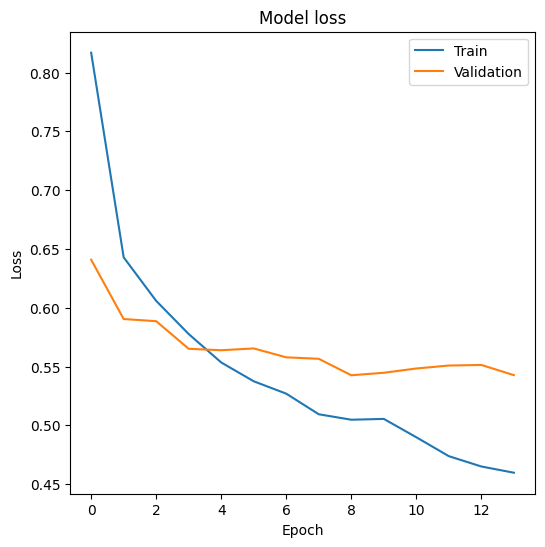

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict
y_pred_proba = model.predict(X_test)
y_pred_classes_encoded = np.argmax(y_pred_proba, axis=1)

# Inverse transform to get original labels (1, 2, 3)
y_pred_original_labels = encoder.inverse_transform(y_pred_classes_encoded)

# Evaluation
print(confusion_matrix(y_test, y_pred_original_labels))
print(classification_report(y_test, y_pred_original_labels))

print("The precision for the test set: {:.4f}".format(precision_score(y_test, y_pred_original_labels, average='weighted')))
print("The recall for the test set: {:.4f}".format(recall_score(y_test, y_pred_original_labels, average='weighted')))
print("The f1 score for the test set: {:.4f}".format(f1_score(y_test, y_pred_original_labels, average='weighted')))
print("The accuracy for the test set: {:.4f}".format(accuracy_score(y_test, y_pred_original_labels)))



37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[356   0  99]
 [ 13   0  13]
 [136   0 549]]
              precision    recall  f1-score   support

           1       0.70      0.78      0.74       455
           2       0.00      0.00      0.00        26
           3       0.83      0.80      0.82       685

    accuracy                           0.78      1166
   macro avg       0.51      0.53      0.52      1166
weighted avg       0.76      0.78      0.77      1166

The precision for the test set: 0.7630
The recall for the test set: 0.7762
The f1 score for the test set: 0.7687
The accuracy for the test set: 0.7762


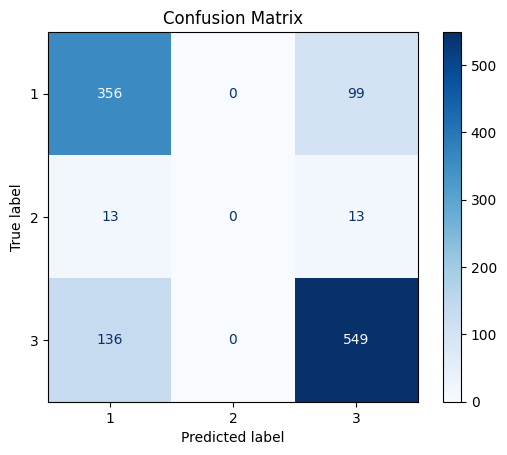

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# For Confusion Matrix Display
cm = confusion_matrix(y_test, y_pred_original_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_) # Or list your original labels [1, 2, 3]
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score


# Calculate AUC-ROC score for multi-class
# y_test needs to be in its original label format (not one-hot encoded)
# y_pred_proba is the array of probabilities for each class
try:
    auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    print("The AUC-ROC score for the test set: {:.4f}".format(auc_roc))
except ValueError as e:
    print(f"Could not calculate AUC-ROC: {e}")

The AUC-ROC score for the test set: 0.8710
